##***LEVEL 2 TASK 1***

## **1.Percentage of Table Booking & Online Delivery**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- This part handles the file upload in Colab ---
print("Please upload your 'Dataset .csv' file:")
uploaded = files.upload()

# Get the file name you just uploaded
file_name = list(uploaded.keys())[0]
print(f"\nSuccessfully uploaded {file_name}")

# --- Task 1: Load the dataset and explore rows/columns ---
df = pd.read_csv(file_name)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Please upload your 'Dataset .csv' file:


Saving Dataset .csv to Dataset .csv

Successfully uploaded Dataset .csv

The dataset has 9551 rows and 21 columns.


Converting 'Has Table booking' to 1/0...
Converting 'Has Online delivery' to 1/0...

Percentage of restaurants with Table Booking: 12.12%
Percentage of restaurants with Online Delivery: 25.66%

Generating plot for service availability...


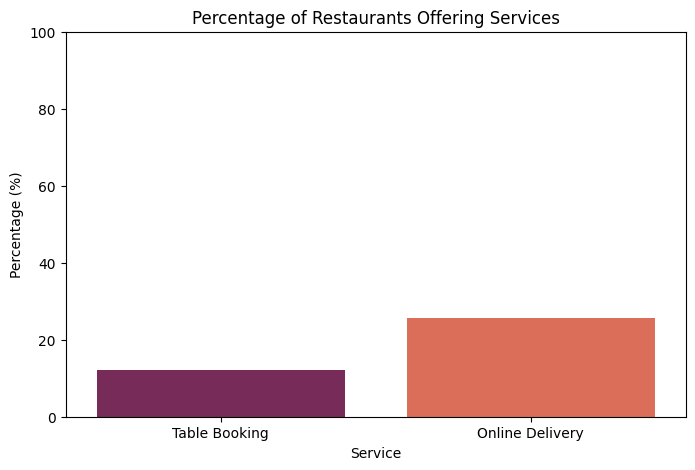

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check if the column is 'object' (text) type before trying to convert
if pd.api.types.is_object_dtype(df['Has Table booking']):
    print("Converting 'Has Table booking' to 1/0...")
    df['Has Table booking'] = df['Has Table booking'].str.strip().map({'Yes': 1, 'No': 0})
else:
    print("'Has Table booking' is already numeric. Skipping conversion.")

if pd.api.types.is_object_dtype(df['Has Online delivery']):
    print("Converting 'Has Online delivery' to 1/0...")
    df['Has Online delivery'] = df['Has Online delivery'].str.strip().map({'Yes': 1, 'No': 0})
else:
    print("'Has Online delivery' is already numeric. Skipping conversion.")
# -----------------------------

# Calculate the mean
table_booking_percent = df['Has Table booking'].mean() * 100
online_delivery_percent = df['Has Online delivery'].mean() * 100

print(f"\nPercentage of restaurants with Table Booking: {table_booking_percent:.2f}%")
print(f"Percentage of restaurants with Online Delivery: {online_delivery_percent:.2f}%")

# --- Visualize this (with warning fix) ---
service_data = pd.DataFrame({
    'Service': ['Table Booking', 'Online Delivery'],
    'Percentage': [table_booking_percent, online_delivery_percent]
})

print("\nGenerating plot for service availability...")
plt.figure(figsize=(8, 5))
sns.barplot(data=service_data, x='Service', y='Percentage', hue='Service', palette="rocket", legend=False)
plt.title('Percentage of Restaurants Offering Services')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.savefig('service_percentages.png')
plt.show()

## **2.Compare Average Ratings (Table Booking vs. No Booking)**

--- Comparing Ratings for Table Booking ---
                       mean  median  count
Has Table booking                         
No Table Booking   2.559359     3.1   8393
Yes, Has Booking   3.441969     3.6   1158

Generating boxplot for rating comparison...


/tmp/ipython-input-1118905061.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Has Table booking', y='Aggregate rating', palette="coolwarm")


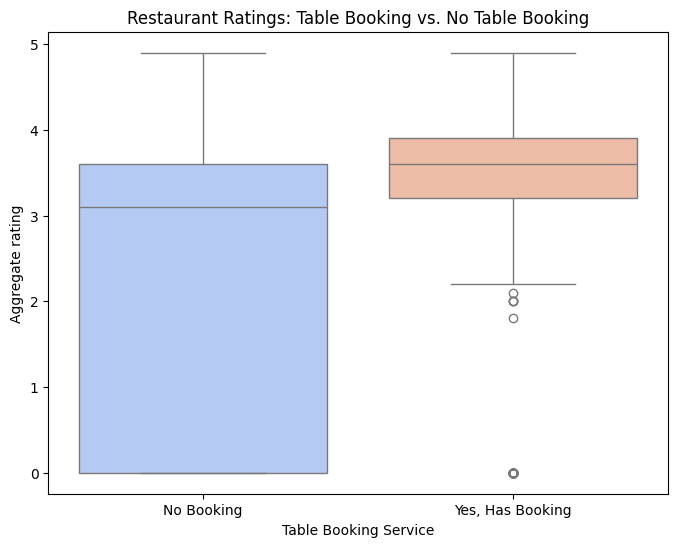

In [13]:

print("--- Comparing Ratings for Table Booking ---")

# Group by 'Has Table booking' and calculate mean, median, and count
# We use the cleaned 'Aggregate rating' column with NaNs
rating_comparison = df.groupby('Has Table booking')['Aggregate rating'].agg(['mean', 'median', 'count'])

# Rename the index to be more readable
rating_comparison.index = rating_comparison.index.map({0: 'No Table Booking', 1: 'Yes, Has Booking'})
print(rating_comparison)

# --- Visualize this with a Boxplot ---
print("\nGenerating boxplot for rating comparison...")
plt.figure(figsize=(8, 6))
# We use the full df. The boxplot will automatically group by x and handle NaNs
sns.boxplot(data=df, x='Has Table booking', y='Aggregate rating', palette="coolwarm")
plt.title('Restaurant Ratings: Table Booking vs. No Table Booking')
plt.xlabel('Table Booking Service')
plt.ylabel('Aggregate rating')
# Change x-axis labels to be clear
plt.xticks(ticks=[0, 1], labels=['No Booking', 'Yes, Has Booking'])
plt.savefig('table_booking_rating_comparison.png')
plt.show()

##**3.Online Delivery vs. Price Ranges**

--- Analyzing Online Delivery by Price Range ---
Has Online delivery     0     1
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53


             % No Delivery  % Has Delivery
Price range                               
1                84.225923       15.774077
2                58.689367       41.310633
3                70.809659       29.190341
4                90.955631        9.044369

Generating stacked bar chart for delivery vs. price range...


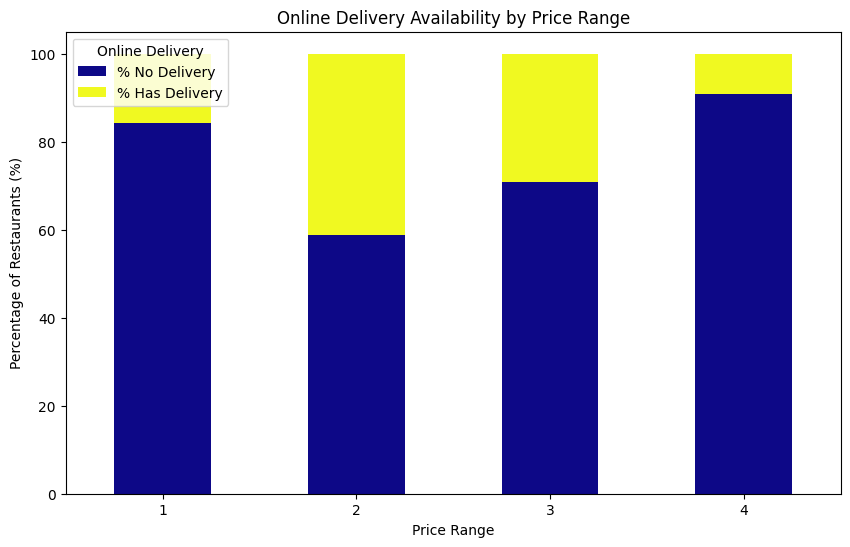

In [14]:
print("--- Analyzing Online Delivery by Price Range ---")

# Create a crosstab to see the counts of delivery (0 or 1) for each price range
# This table shows counts
delivery_price_crosstab = pd.crosstab(df['Price range'], df['Has Online delivery'])
print(delivery_price_crosstab)
print("\n")

# This is more useful: normalize 'index' to see the *percentage*
# This reads "For Price Range 1, what % have delivery?"
delivery_price_percent = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
delivery_price_percent.columns = ['% No Delivery', '% Has Delivery']
print(delivery_price_percent)

# --- Visualize this with a stacked bar chart ---
print("\nGenerating stacked bar chart for delivery vs. price range...")
# We plot the *percentage* crosstab
delivery_price_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='plasma'
)

plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants (%)')
plt.legend(title='Online Delivery', loc='upper left')
plt.xticks(rotation=0) # Keep x-labels horizontal
plt.savefig('delivery_by_price_range.png')
plt.show()